# The Shop Around the Corner

## Colab Setup
- Install OS Packages SQLite, Graphviz
- Install Python Packages 
- Load IPython Magic 

In [1]:
!apt-get -y install sqlite3 graphviz
!pip install ipython-sql schemadisplay-magic
%load_ext sql
%load_ext schemadisplay_magic

zsh:1: command not found: apt-get


## Goal
*Describe the database, should have at least two entity with one relation*

"The Shop Around the Corner" is a small children's bookstore in Manhattan's Upper West Side

Kathleen Kelly needs a database to search books and compete with Fox Books.

The database manage books names, genre and price and related authors

# Conceptual Model

Using an ER Diagram in draw.io to sketch the diagram

Using File -> Embed -> Image copy the HTML code and paste in a Markdown Cell

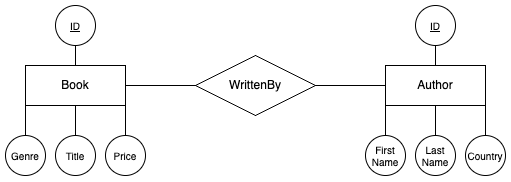

# Logical Model

Using an ER Diagram with Relational Model in draw.io to sketch the diagram

Using File -> Embed -> Image copy the HTML code and paste in a Markdown Cell

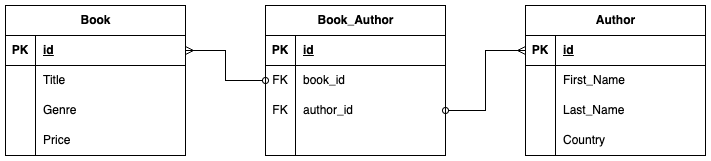

# Database Schema

In [2]:
# Connect to the DB
%sql sqlite:///bookstore.db

In [7]:
%sql

 * sqlite:///bookstore.db


In [3]:
%%sql
DROP TABLE IF EXISTS book;
CREATE TABLE IF NOT EXISTS book(
id     INTEGER PRIMARY KEY NOT NULL,
title  TEXT    NOT NULL,
genre  TEXT    default 'children',
price  NUMBER NOT NULL
);

 * sqlite:///bookstore.db
Done.
Done.


[]

In [4]:
%%sql
DROP TABLE IF EXISTS author;
CREATE TABLE IF NOT EXISTS author(
id          INTEGER PRIMARY KEY NOT NULL,
first_name  TEXT,
last_name   TEXT    NOT NULL,
country     TEXT 
);

 * sqlite:///bookstore.db
Done.
Done.


[]

In [5]:
%%sql
DROP TABLE IF EXISTS book_author;
CREATE TABLE IF NOT EXISTS book_author(
id          INTEGER PRIMARY KEY NOT NULL,
book_id     INTEGER REFERENCES book(id),
author_id   INTEGER REFERENCES author(id)
);

 * sqlite:///bookstore.db
Done.
Done.


[]

## Display Physical Schema

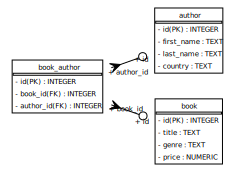

In [6]:
%schema --connection_string sqlite:///bookstore.db

## Insert data
*Insert some data in tables, optionally add some update or delete*

In [10]:
%%sql
delete from book;
insert into book(id,title,genre,price) 
values 
(1,'Winnie-The-Pooh','Children''s literature',12.64),
(2,'The Diary of a Young Girl','Autobiography',13.25),
(3,'The Little Prince','Children''s literature',13.91),
(4,'The Adventures of Pinocchio','Fantasy',14.53),
(5,'Heart','Fiction',9.57),
(6,'Philosopher''s Stone','Fantasy',11.40),
(7,'Chamber of Secrets','Fantasy',11.40),
(8,"Alice's Adventures in Wonderland",'Portal fantasy',9.80)

 * sqlite:///bookstore.db
8 rows affected.
8 rows affected.


[]

In [11]:
%%sql
delete from author;
insert into author(id,first_name,last_name,country)
values
(1,'Alan Alexander','Milne','England'),
(2,'Anne','Frank','Germany'),
(3,'Antoine','de Saint-Exupéry','France'),
(4,'Carlo','Collodi','Italy'),
(5,'Edmondo','De Amicis','Italy'),
(6,'J.K.','Rowling','England'),
(7,'Lewis','Carroll','England'),
(8,'John','Tenniel','England')

 * sqlite:///bookstore.db
0 rows affected.
8 rows affected.


[]

In [12]:
%%sql
insert into book_author(book_id, author_id)
values 
(1,1),
(2,2),
(3,3),
(4,4),
(5,5),
(6,6),
(7,6),
(8,7),
(8,8)


 * sqlite:///bookstore.db
9 rows affected.


[]

## Query 1: Number of books

In [13]:
%%sql
select count(*) as num from book

 * sqlite:///bookstore.db
Done.


num
8


## Query 2: List of books and authors

In [14]:
%%sql
select title, genre, price, first_name, last_name, country
from 
book b
join book_author ba on b.id=ba.book_id
join author a on a.id=ba.author_id



 * sqlite:///bookstore.db
Done.


title,genre,price,first_name,last_name,country
Winnie-The-Pooh,Children's literature,12.64,Alan Alexander,Milne,England
The Diary of a Young Girl,Autobiography,13.25,Anne,Frank,Germany
The Little Prince,Children's literature,13.91,Antoine,de Saint-Exupéry,France
The Adventures of Pinocchio,Fantasy,14.53,Carlo,Collodi,Italy
Heart,Fiction,9.57,Edmondo,De Amicis,Italy
Philosopher's Stone,Fantasy,11.4,J.K.,Rowling,England
Chamber of Secrets,Fantasy,11.4,J.K.,Rowling,England
Alice's Adventures in Wonderland,Portal fantasy,9.8,Lewis,Carroll,England
Alice's Adventures in Wonderland,Portal fantasy,9.8,John,Tenniel,England


## Query 3: Count books per country 

In [21]:
%%sql
select country  nazione,count(distinct(book_id)) as numero_libri
from 
author a
join book_author ba on a.id=ba.author_id
group by country
order by count(distinct(book_id)) desc

 * sqlite:///bookstore.db
Done.


nazione,numero_libri
England,4
Italy,2
Germany,1
France,1


## Query 3 bis: Count books per genre

In [26]:
%%sql 
select 
genre,count(*) as num
from book
group by genre
order by num

 * sqlite:///bookstore.db
Done.


genre,num
Autobiography,1
Fiction,1
Portal fantasy,1
Children's literature,2
Fantasy,3


## Query 4: Books with more than 1 author

In [31]:
%%sql
select 
title, count(distinct(b.id)),count(distinct(a.id))
from book b
join book_author ba on b.id=ba.book_id
join author a on a.id=ba.author_id
where 
a.country='England'
group by title
having count(distinct(a.id))>1

 * sqlite:///bookstore.db
Done.


title,count(distinct(b.id)),count(distinct(a.id))
Alice's Adventures in Wonderland,1,2


## Close connection

In [ ]:
%sql -x sqlite:///bookstore.db